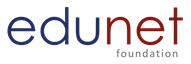

# Edunet Foundation : Class Room Exercises 

## Lab 31: Classification of Images from the CIFAR-10 Dataset using ANN (MLP) & CNN

### Objective: 
The objective of the "Classification of Images from the CIFAR-10 Dataset using ANN (MLP) & CNN" lab is to equip learners with the knowledge and skills to build and evaluate image classification models using Artificial Neural Networks (ANN) and Convolutional Neural Networks (CNN). The course begins with fundamental concepts of neural networks and image data representation. It advances to implementing Multilayer Perceptrons (MLP) and CNNs using Python libraries such as TensorFlow and Keras. Learners will gain hands-on experience in preprocessing image data, designing network architectures, and training models to classify images into ten different categories from the CIFAR-10 dataset. By the end of the lab, learners will be proficient in applying ANN and CNN techniques to image classification tasks, enabling them to tackle similar problems in real-world applications.

# Classification of Images from the CIFAR-10 Dataset using  ANN (MLP) & CNN.
The CIFAR-10 dataset consists of color 60,000 images each with 32 x 32 pixel in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images.

Class labels are:

airplane : 0, automobile : 1, bird : 2, cat : 3, deer : 4, dog : 5, frog : 6, horse : 7, ship : 8, truck : 9.

### Import Tensorflow

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Check for GPU

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
#physical_devices
print("Num GPUs Available: ", len(physical_devices))
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


# Load Dataset

In [3]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## Show some sample images of data set with corresponding labels.


Example training images and their labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


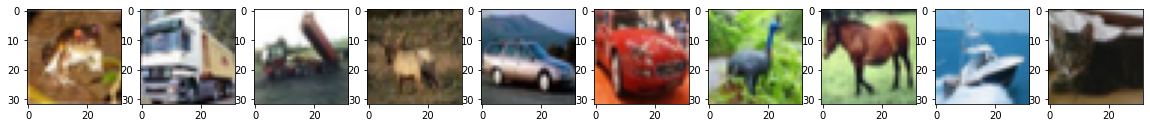

In [4]:
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:10]])) 
print('Corresponding classes for the labels: ' + str([cifar10_classes[x[0]] for x in y_train[0:10]]))

fig, axarr = plt.subplots(1, 10)
fig.set_size_inches(20, 6)

for i in range(10):
    image = x_train[i]
    axarr[i].imshow(image)
plt.show()

In [5]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

## Preparing the dataset
Normalize the input data

In [6]:
X_train = x_train / 255.0
X_test = x_test / 255.0
# Every Neuron is expected to have value from 0 to 1 to converge quickly(Gradient Descent)

# MLP Network

* I/p Layer - Flatten
* Hidden layer - 2048, AF = 'RELU'
* O/p Layer - 10 , AF-Softmax

In [7]:
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Flatten

In [8]:
ann = keras.Sequential()
ann.add(Flatten(input_shape=(32,32,3)))
ann.add(Dense(2048,activation='relu'))
ann.add(Dense(10,activation='softmax'))

In [9]:
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 2048)              6293504   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                20490     
Total params: 6,313,994
Trainable params: 6,313,994
Non-trainable params: 0
_________________________________________________________________


In [10]:
ann.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
history = ann.fit(X_train ,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 12s 5ms/step - loss: 1.9348 - accuracy: 0.3267 - val_loss: 1.7096 - val_accuracy: 0.3925
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6854 - accuracy: 0.3959 - val_loss: 1.6272 - val_accuracy: 0.4172
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6184 - accuracy: 0.4230 - val_loss: 1.6549 - val_accuracy: 0.4100
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5705 - accuracy: 0.4392 - val_loss: 1.5499 - val_accuracy: 0.4478
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5407 - accuracy: 0.4514 - val_loss: 1.5523 - val_accuracy: 0.4408
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5111 - accuracy: 0.4634 - val_loss: 1.5521 - val_accuracy: 0.4553
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4911 - accuracy: 0.4695 - val_loss: 1.5157 - val_accuracy

#### With the below simple function we will be able to plot our training history.

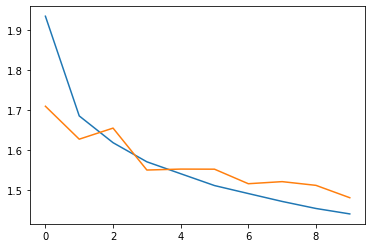

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

## CNN Model

In [13]:
from tensorflow import keras
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout

In [14]:
cnn = keras.Sequential()
cnn.add(Conv2D(32, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu', input_shape = (32,32,3)))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(64, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(128, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(256, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(Dense(10,activation='softmax'))

In [15]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 256)        

In [16]:
cnn.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = cnn.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 18s 7ms/step - loss: 1.6197 - accuracy: 0.3998 - val_loss: 1.2401 - val_accuracy: 0.5425
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1773 - accuracy: 0.5796 - val_loss: 1.0552 - val_accuracy: 0.6266
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9728 - accuracy: 0.6613 - val_loss: 0.8964 - val_accuracy: 0.6860
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8417 - accuracy: 0.7102 - val_loss: 0.8575 - val_accuracy: 0.7009
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7343 - accuracy: 0.7465 - val_loss: 0.8036 - val_accuracy: 0.7208
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6516 - accuracy: 0.7753 - val_loss: 0.7712 - val_accuracy: 0.7403
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5820 - accuracy: 0.8004 - val_loss: 0.7836 - val_accuracy

In [17]:
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

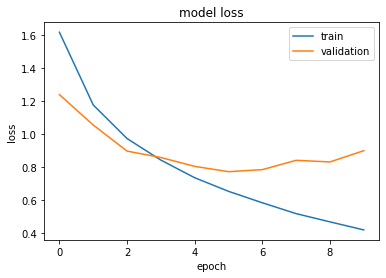

In [18]:
plotLosses(history)

In [19]:
def plotAccuracy(history):  
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

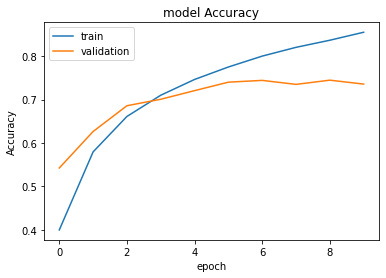

In [20]:
plotAccuracy(history)

# Happy Learning 